In [1]:
!pip install tensorflow

### Prendiamo sempre il dataset MNIST. Facciamo un classificatore pari-dispari
 - Prendi il dataset crea delle labels binarie
 - Fai split e preprocessing come nel notebook precedente
 - Crea un MLP come nel notebook precedente ed addestralo

In [2]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import InputLayer, Dense, Input
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

### Preprocessing

In [3]:
#Dataset preprocessing (ravel/reshape images)
(x_train, y_train), (x_test, y_test)=load_data()

#reshape matrices in 1d array
num_datapoints_train = x_train.shape[0]
num_datapoints_test = x_test.shape[0]
x_train = np.reshape(x_train, [num_datapoints_train, -1])
x_test = np.reshape(x_test, [num_datapoints_test, -1])
print(x_train.shape)

(60000, 784)


In [4]:
#images normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
# new y_train and y_test
y_train = np.where(y_train % 2 == 0,0,1) #1 = odd, 0 = even
# y_train = y_train % 2 #equivalent
y_test = np.where(y_test % 2 == 0,0,1) #1 = odd, 0 = even
# y_test = y_test % 2 #equivalent

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([29492, 30508], dtype=int64))
(array([0, 1]), array([4926, 5074], dtype=int64))


### Model construction

In [6]:
def get_seq_model():
    clear_session()
    input_layer = InputLayer(shape=(784,))
    hidden_layer1 = Dense(1000, activation="relu")
    hidden_layer2 = Dense(500, activation="relu")
    output_layer = Dense(2, activation='softmax')
    model = Sequential()
    model.add(input_layer)
    model.add(hidden_layer1)
    model.add(hidden_layer2)
    model.add(output_layer)
    
    model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["accuracy"])
    return model

In [7]:
model = get_seq_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286,502 (4.91 MB)

 Trainable params: 1,286,502 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9452 - loss: 0.1539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9839 - loss: 0.0489
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9931 - loss: 0.0245
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9951 - loss: 0.0159
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9960 - loss: 0.0140
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9976 - loss: 0.0089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9982 - loss: 0.0079
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9988 - loss: 0.0047
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9985 - loss: 0.0043


In [9]:
def plot_learning_curve(history):
    plt.figure()
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["accuracy"], label = "accuracy")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("Learning curve")
    plt.show()

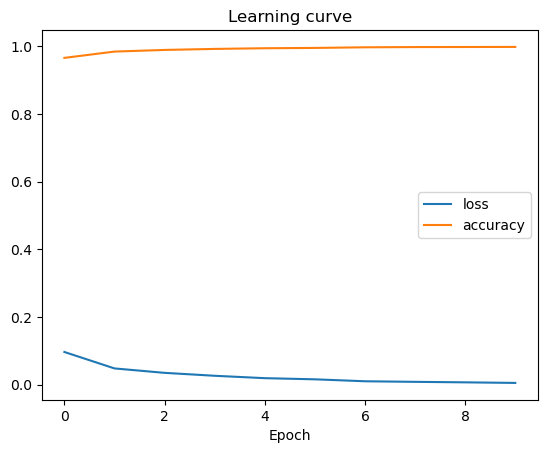

In [10]:
plot_learning_curve(history)

In [11]:
raw_pred = model.predict(x_test)
print(raw_pred.shape)
y_pred = np.argmax(raw_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 2)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.99      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[4877   49]
 [  48 5026]]


### Singolo neurone di output
- Per classificazione binaria, posso anche costruire la rete usando UN neurone di output, sigmoide e binary crossentropy!
 - Crea ed addestra un MLP di questo tipo, senza toccare il dataset

Single output model

In [12]:
def get_seq_model2():
    clear_session()
    input_layer = InputLayer(shape=(784,))
    hidden_layer1 = Dense(1000, activation="relu")
    hidden_layer2 = Dense(500, activation="relu")
    output_layer = Dense(1, activation='sigmoid')
    model = Sequential()
    model.add(input_layer)
    model.add(hidden_layer1)
    model.add(hidden_layer2)
    model.add(output_layer)
    
    model.compile(loss = 'binary_crossentropy', 
                  metrics=["accuracy"])
    return model

In [13]:
model2 = get_seq_model2()
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286,001 (4.91 MB)

 Trainable params: 1,286,001 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history2 = model2.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9409 - loss: 0.1555
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9830 - loss: 0.0488
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9898 - loss: 0.0320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9932 - loss: 0.0222
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9959 - loss: 0.0139
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9968 - loss: 0.0111
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9968 - loss: 0.0101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9986 - loss: 0.0051
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9990 - loss: 0.0033
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9992 - loss: 0.0026


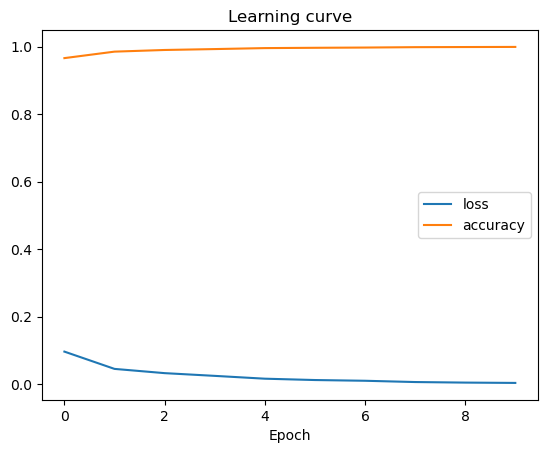

In [15]:
plot_learning_curve(history2)

In [16]:
raw_pred2 = model2.predict(x_test)
print(raw_pred2.shape)

y_pred2 = np.where(raw_pred2 >= 0.5, 1, 0)

cm2 = confusion_matrix(y_test, y_pred2)

print(classification_report(y_test, y_pred2))

print(cm2)
# print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 1)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4926
           1       1.00      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[4905   21]
 [  74 5000]]


### API funzionali
- sempre senza toccare il dataset, ricrea il modello precedente usando le API funzionali ed addestralo

In [17]:
#functional api
def get_func_model():
    clear_session()
    input_layer = Input(shape=(784,))
    hidden_layer1 = Dense(1000, activation="relu")(input_layer)
    hidden_layer2 = Dense(500, activation="relu")(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(loss = 'binary_crossentropy', 
                  metrics=["accuracy"])
    return model    

In [18]:
model3 = get_func_model()
model3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286,001 (4.91 MB)

 Trainable params: 1,286,001 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history3 = model3.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9402 - loss: 0.1570
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9847 - loss: 0.0452
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9901 - loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9926 - loss: 0.0238
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9946 - loss: 0.0177


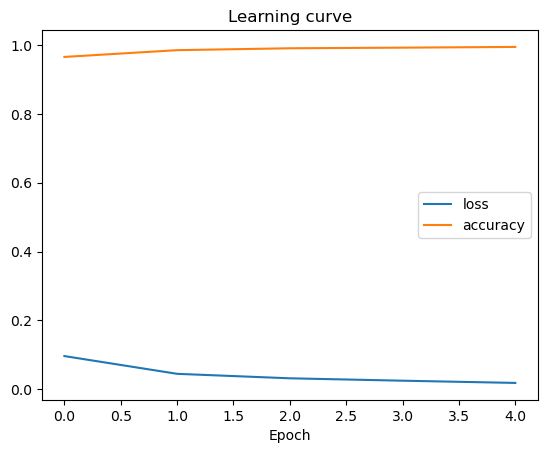

In [20]:
plot_learning_curve(history3)

In [21]:
raw_pred3 = model3.predict(x_test)
print(raw_pred3.shape)

y_pred3 = np.where(raw_pred3 >= 0.5, 1, 0)

cm3 = confusion_matrix(y_test, y_pred3)

print(classification_report(y_test, y_pred3))

print(cm3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 1)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.99      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[4875   51]
 [  37 5037]]


<font color='red'>Va BENISSIMO fare copia-incolla dai notebook precedenti: <br>
    &nbsp;&nbsp;&nbsp;&nbsp; → non devi imparare cose a memoria, devi capire come funzionano e sapere dove copiare, cosa modifiare e come! <br>
    Riesci a superare tutti gli errori ed a ottenere delle buone test accuracy?</font>